## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_df= pd.merge(mouse_metadata, study_results, on="Mouse ID")
mouse_study_df
# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mouse_study_df.count()
mouse_study_df["Mouse ID"].value_counts()


g989    13
o562    10
n304    10
b128    10
o926    10
        ..
b447     1
f932     1
d133     1
x336     1
l872     1
Name: Mouse ID, Length: 249, dtype: int64

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_study_df.loc[mouse_study_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False),["Mouse ID", "Timepoint"]]
# dupe_df= mouse_study_df[ :, "Mouse ID","Timepoint"].drop_duplicates()
# dupe_df

,Mouse ID,Timepoint
908,g989,0
909,g989,0
910,g989,5
911,g989,5
912,g989,10
913,g989,10
914,g989,15
915,g989,15
916,g989,20
917,g989,20


In [4]:
# dupe2_df= dupe_df.drop_duplicates()
# dupe2_df

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
# dropped_df= duplicate_df.drop_duplicates(subset=['Mouse ID','Timepoint'], keep='first', inplace=True, ignore_index=False)
# dropped_df
# duplicate_df= dupe_df.duplicated(subset= 'Mouse ID', keep='first')
# duplicate_df
# new_df= mouse_study_df["Mouse ID"].drop_duplicates()
# new_df
mouse_study_df.loc[mouse_study_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False),:]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df= mouse_study_df.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep='first', inplace=False,ignore_index=False) 
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].value_counts()

o562    10
a699    10
x822    10
a818    10
d251    10
        ..
b447     1
f932     1
d133     1
x336     1
l872     1
Name: Mouse ID, Length: 249, dtype: int64

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_df= clean_df.loc[:,"Drug Regimen","Tumor Volume (mm3)"]
tumor_df

# This method is the most straighforward, creating multiple series and putting them all together at the end.
# clean_mean= tumor_df["Tumor Volume (mm3)"].mean()
# clean_median= tumor_df["Tumor Volume (mm3)"].median()
# clean_variance= tumor_df["Tumor Volume (mm3)"].var()
# clean_stdev= tumor_df["Tumor Volume (mm3)"].std()
# clean_sem= tumor_df["Tumor Volume (mm3)"].sem

# clean_summary_df= pd.DataFrame({"Mean": clean_mean,"Median": clean_median, "Variance": clean_variance,
#                                "Standard Deviation": clean_stdev, "SEM":clean_sem})

# clean_summary_df


IndexingError: Too many indexers

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
clean_data_group = clean_df.groupby("Drug Regimen").agg(['mean', 'median', 'var', 'std', 'sem' ])
clean_data_group_tumor= clean_data_group["Tumor Volume (mm3)"]
clean_data_group_tumor

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

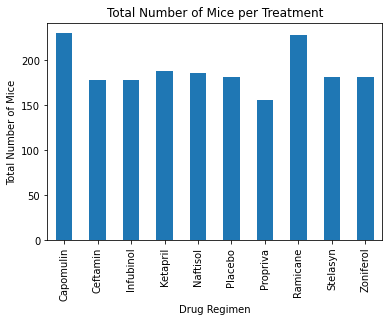

<Figure size 432x288 with 0 Axes>

In [17]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mice_drug_df= clean_df.groupby("Drug Regimen")
mice_count= mice_drug_df["Mouse ID"].count()
total_mice_drug_df= ({"Number of Mice": mice_count})
total_mice_drug_df
# total_mice_drug_df.plot.bar(x='Drug Regimen',y='Number of Mice', color='r', alpha=0.5, align="center")
drug_mice_chart = mice_count.plot(kind="bar", title="Total Number of Mice per Treatment")
drug_mice_chart.set_xlabel("Drug Regimen")
drug_mice_chart.set_ylabel("Total Number of Mice")

plt.show()
plt.tight_layout()
# plt.bar(x_axis, users, color='r', alpha=0.5, align="center")

Text(0, 0.5, 'Total Number of Mice')

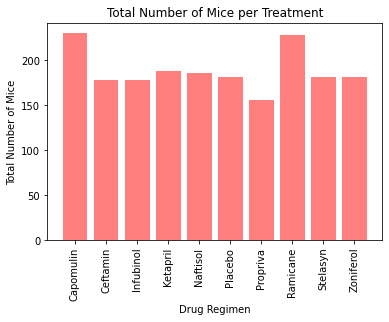

In [18]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
mice_count=[230, 178, 178, 188, 186, 181, 156, 228, 181, 182]
x_axis = np.arange(len(mice_count))
plt.bar(x_axis, mice_count, color='r', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ceftamin","Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane",
 "Stelasyn", "Zoniferol"], rotation= 'vertical')
# plt.xlim(-0.75, len(x_axis)-0.25)
plt.title("Total Number of Mice per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Mice")

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
